In [0]:
from keras import applications

vgg = applications.VGG19(weights='imagenet', include_top=False)
vgg.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import plot_model
from keras import regularizers
from imgaug import augmenters as iaa
import cv2
from keras import backend as K

epochs = 50
batch_size = 32
img_width, img_height = 32, 32
weight_decay = 0.0005

# handle image format
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# download cifar data and split into train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
x_train = x_train / 255.0
x_test = x_test / 255.0

# augment image, cropping, flipping, Gaussian blur
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.GaussianBlur(sigma=(0, 0.5))
])

images_aug = seq.augment_images(x_train)
new_x_train = np.append(x_train, images_aug, axis=0)
new_y_train = np.append(y_train, y_train, axis=0)

model = keras.Sequential([    
  keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
  keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),  
  keras.layers.BatchNormalization(),
  
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),  
  
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),
  
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),
  
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),

  keras.layers.Flatten(),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.5),    
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
trainmodel = model.fit(new_x_train, new_y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=batch_size)

test_loss, test_acc = model.evaluate(x_test, y_test)

Using TensorFlow backend.


Epoch 1/50
3125/3125 [==============================] - 208s 66ms/step - loss: 2.4267 - accuracy: 0.3047 - val_loss: 1.9500 - val_accuracy: 0.3364
Epoch 2/50
3125/3125 [==============================] - 207s 66ms/step - loss: 1.4902 - accuracy: 0.5155 - val_loss: 1.5419 - val_accuracy: 0.5112
Epoch 3/50
3125/3125 [==============================] - 207s 66ms/step - loss: 1.2185 - accuracy: 0.6347 - val_loss: 1.2363 - val_accuracy: 0.6086
Epoch 4/50
3125/3125 [==============================] - 206s 66ms/step - loss: 1.0955 - accuracy: 0.6818 - val_loss: 1.1887 - val_accuracy: 0.6440
Epoch 5/50
3125/3125 [==============================] - 206s 66ms/step - loss: 1.0047 - accuracy: 0.7176 - val_loss: 1.0936 - val_accuracy: 0.6936
Epoch 6/50
3125/3125 [==============================] - 206s 66ms/step - loss: 0.9430 - accuracy: 0.7444 - val_loss: 1.1252 - val_accuracy: 0.6919
Epoch 7/50
3125/3125 [==============================] - 206s 66ms/step - loss: 0.8983 - accuracy: 0.7641 - val_loss: 1

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.8128 - accuracy: 0.8272
Test accuracy: 0.8271999955177307


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [0]:
# check GPU model and memory
!nvidia-smi

Fri May  8 14:50:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

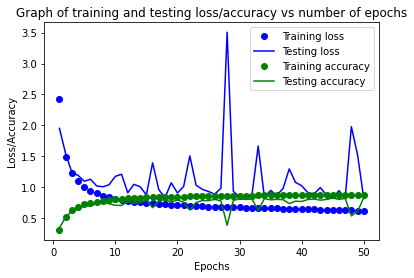

<Figure size 432x288 with 0 Axes>

In [0]:
# plot accuracy of model in a graph
history = trainmodel.history
history.keys()

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Testing loss')
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'go', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'g', label='Testing accuracy')
plt.title('Graph of training and testing loss/accuracy vs number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()

plt.show()
plt.savefig('evaluation.png')

In [0]:
# Save entire model to a HDF5 file
model.save('cifar.h5')